In [1]:
# Подключение библиотек
import pandas
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy
import re
import plotly
# Использование последней версии plotly
plotly.offline.init_notebook_mode(connected=True) 
import plotly.graph_objs as graph_objs
import plotly.figure_factory as figure_factory
from IPython.display import display

In [2]:
# Открытие csv выборки с данными
# Данный набор данных собран по региону США в Google Play за январь 2020 года
df = pandas.read_csv('aso_csv.csv', delimiter=';')

# Подготовка данных - удаление не нужных стобцов
df.dropna(subset=['id', 'data_id','releaseDayCount', 'UpdateDaysCount'])

# Расчет среднего рейтинга приложения, присваивание типа приложения - платное\бесплатное
df['rating'] = df.apply(lambda x: (x['ratingHistogram.1']+x['ratingHistogram.2']*2 + x['ratingHistogram.3']*3 + x['ratingHistogram.4']*4+ x['ratingHistogram.5']*5)/x['reviewCount'], axis=1)
df['rating'] = df['rating'].apply(lambda x: float(str(x).replace(',','.')))
df['price_type']=df['price'].apply(lambda x: 'Paid' if (x > 0) else 'Free')

# Вывод полученного набора данных
df


,index,id,data_id,title,bundle,Category,price,releaseDate,releaseDayCount,installs,...,appSize,version,androidVersion,contentRating,developerContacts,timestamp,developer,Geo,price_type,aso_keywords
0,19049,66232,23197,ComiCat (Comic Reader/Viewer),meanlabs.comicat,COMICS,NaN,20.10.2012,2657.0,10000.0,...,26,2.42,4.0 and up,Everyone,support@meanlabs.com,19.01.2020,Meanlabs Software,en_US,Free,"[('comic reader', 44), ('comicat comic', 24), ..."
1,19066,67845,24767,10bii Financial Calculator,com.inadaydevelopment.cashcalculator,FINANCE,NaN,08.11.2010,3369.0,10000.0,...,6.2,4.2.3,4.4 and up,Everyone,theteam@inadaydevelopment.com,19.01.2020,In A Day Development,en_US,Free,"[('financial calculator', 68), ('10bii financi..."
2,19069,63515,20498,Children's doctor : dentist.,com.YovoGames.dentist,GAME_ROLE_PLAYING,0.0,09.08.2017,903.0,10000000.0,...,20,1.1.6,4.1 and up,Everyone,yovogames@gmail.com,19.01.2020,YovoGames,en_US,Free,"[('s doctor', 28), ('doctor dentist', 28), ('c..."
3,19112,63523,20506,Mario Kart Tour,com.nintendo.zaka,GAME_ACTION,0.0,24.09.2019,127.0,50000000.0,...,120,1.4.1,4.4 and up,Everyone,mariokarttour-support@nintendo.co.jp,19.01.2020,"Nintendo Co., Ltd.",en_US,Free,"[('mario kart', 60), ('kart tour', 32), ('mari..."
4,19134,66254,23219,Piano Academy - Learn Piano,com.yokee.piano.keyboard,MUSIC_AND_AUDIO,0.0,19.12.2019,41.0,100000.0,...,34,1.0.2,6.0 and up,Everyone,support@pianoacademy.app,19.01.2020,Yokee™,en_US,Free,"[('piano academy', 40), ('u0026 39', 40), ('le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,37664,81703,37657,Sago Mini Apartment,com.sagosago.Apartment.googleplay,EDUCATION,NaN,25.04.2018,644.0,5000.0,...,59,1.1,4.1 and up,Everyone,support@sagomini.com,19.01.2020,Sago Mini,en_US,Free,"[('sago mini', 28), ('mini apartment', 24), ('..."
17210,37665,81704,37658,Sago Mini Pet Cafe,com.sagosago.PetCafe.googleplay,EDUCATION,NaN,06.09.2017,875.0,10000.0,...,23,1.1,4.1 and up,Everyone,support@sagomini.com,19.01.2020,Sago Mini,en_US,Free,"[('sago mini', 28), ('pet cafe', 28), ('mini p..."
17211,37666,81705,37659,Sago Mini Puppy Preschool,com.sagosago.PuppyPark.googleplay,EDUCATION,NaN,13.12.2016,1142.0,10000.0,...,59,1.0,4.0.3 and up,Everyone,support@sagomini.com,19.01.2020,Sago Mini,en_US,Free,"[('sago mini', 32), ('mini puppy', 24), ('pupp..."
17212,37667,81706,37660,Fuzzy House Premium,com.fuzzyhouse.FuzzyHousePremium,GAME_ROLE_PLAYING,NaN,30.06.2016,1308.0,5000.0,...,67,1.3,4.1 and up,Everyone,info@fuzzyhouse.com,19.01.2020,Fuzzy House Aps,en_US,Free,"[('fuzzy house', 64), ('house premium', 24), (..."


In [3]:
# Краткая сводка по набору данных, показывает информацию по каждому столбцу 
df.describe().astype(float)

,index,id,data_id,price,releaseDayCount,installs,rating,reviewCount,ratingHistogram.1,ratingHistogram.2,ratingHistogram.3,ratingHistogram.4,ratingHistogram.5,UpdateDaysCount
count,17214.000000,17214.000000,17214.000000,13015.0,17056.000000,1.721400e+04,16311.000000,1.631100e+04,1.720500e+04,1.720500e+04,1.631100e+04,1.631100e+04,1.631100e+04,17197.000000
mean,29053.821715,72308.006216,29054.500000,0.0,1179.702978,1.084528e+07,4.144060,2.515476e+05,1.905757e+04,5.398597e+03,1.292055e+04,2.951207e+04,1.833163e+05,177.234750
std,4974.197105,5206.605882,4969.398102,0.0,984.133452,1.362987e+08,0.588282,2.336588e+06,2.147279e+05,6.428791e+04,1.346227e+05,2.594049e+05,1.677139e+06,363.917872
min,19049.000000,63465.000000,20448.000000,0.0,12.000000,0.000000e+00,1.000000,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.000000
25%,24750.250000,67829.250000,24751.250000,0.0,306.000000,1.000000e+04,3.932134,3.210000e+02,1.900000e+01,5.000000e+00,1.400000e+01,3.000000e+01,1.900000e+02,18.000000
50%,29053.500000,72179.500000,29054.500000,0.0,942.000000,1.000000e+05,4.288062,4.191000e+03,2.910000e+02,8.300000e+01,1.960000e+02,4.400000e+02,2.695000e+03,43.000000
75%,33360.750000,76775.750000,33357.750000,0.0,1884.250000,1.000000e+06,4.542325,4.367500e+04,3.125000e+03,9.120000e+02,2.122000e+03,5.173500e+03,3.006950e+04,140.000000
max,37668.000000,81707.000000,37661.000000,0.0,3653.000000,5.000000e+09,5.000000,1.034850e+08,1.022515e+07,3.255008e+06,6.333104e+06,1.190628e+07,7.223642e+07,3236.000000


In [4]:
# Получение количества приложений в каждой категории
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

# Подготовка данных для вывода графика
data = [graph_objs.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

# Вывод графика
plotly.offline.iplot(data, filename='active_category')

# Вывод списка со значениями 
number_of_apps_in_category.sort_values(ascending=False)

GAME_CASUAL            500
EDUCATION              488
GAME_PUZZLE            468
GAME_EDUCATIONAL       453
ENTERTAINMENT          434
GAME_SIMULATION        426
MUSIC_AND_AUDIO        425
GAME_ARCADE            412
WEATHER                400
GAME_ADVENTURE         399
PERSONALIZATION        399
VIDEO_PLAYERS          398
BUSINESS               395
FINANCE                391
HEALTH_AND_FITNESS     391
GAME_ROLE_PLAYING      389
MEDICAL                386
BOOKS_AND_REFERENCE    386
PHOTOGRAPHY            383
GAME_SPORTS            380
SPORTS                 373
COMMUNICATION          371
AUTO_AND_VEHICLES      369
TRAVEL_AND_LOCAL       368
TOOLS                  368
LIFESTYLE              366
GAME_ACTION            363
GAME_BOARD             360
SOCIAL                 353
PRODUCTIVITY           348
GAME_STRATEGY          347
GAME_WORD              346
GAME_RACING            345
GAME_CARD              340
MAPS_AND_NAVIGATION    334
NEWS_AND_MAGAZINES     326
FOOD_AND_DRINK         322
A

In [5]:
# Общий объем установок в каждой категории
installs_of_apps_in_category = df.groupby('Category')['installs'].sum()

# Константа,делит суммарное количество установок, для удобства восприятия.  
sum_size=1000000
display('Указано количество в миллионах установок*')


# Подготовка данных для построения графика
data = [graph_objs.Pie(
        labels = installs_of_apps_in_category.index,
        values = installs_of_apps_in_category.values/sum_size,
        hoverinfo = 'label+value'
    
)]

# Построение графика
plotly.offline.iplot(data, filename='active_category')

# Вывод списка категорий с суммарным количеством установок
installs_of_apps_in_category.sort_values(ascending=False)/sum_size

'Указано количество в миллионах установок*'

Category
COMMUNICATION          28743.734622
PRODUCTIVITY           24597.574626
SOCIAL                 24102.695432
TOOLS                  10146.149400
VIDEO_PLAYERS           9361.486856
MUSIC_AND_AUDIO         9304.638711
TRAVEL_AND_LOCAL        7382.170337
GAME_CASUAL             6804.511412
PHOTOGRAPHY             6275.722240
GAME_ARCADE             5807.704201
GAME_ACTION             5314.867500
GAME_RACING             5233.890950
GAME_SPORTS             3728.194090
ENTERTAINMENT           3383.720220
GAME_SIMULATION         2573.750560
GAME_PUZZLE             2464.074565
NEWS_AND_MAGAZINES      2452.724772
GAME_STRATEGY           2387.891850
BOOKS_AND_REFERENCE     2223.763322
PERSONALIZATION         2192.535575
SHOPPING                1703.211611
HEALTH_AND_FITNESS      1639.311680
MAPS_AND_NAVIGATION     1637.236933
GAME_ADVENTURE          1487.401881
GAME_WORD               1357.096951
BUSINESS                1303.276036
GAME_EDUCATIONAL        1302.410171
GAME_ROLE_PLAYING  

In [6]:
# Среднее количество установок в каждой категории на одно приложение 
minstalls_per_app = df.groupby('Category')['installs'].sum()/df['Category'].value_counts()

display('Указано количество в миллионах установок*')

# Подготовка данных для построения графика
data = [graph_objs.Pie(
        labels = minstalls_per_app.index,
        values = minstalls_per_app.values/1000000,
        hoverinfo = 'label+value'
    
)]

# Построение графика
plotly.offline.iplot(data, filename='active_category')

# Вывод данных в виде таблицы
minstalls_per_app.sort_values(ascending=False)/1000000


'Указано количество в миллионах установок*'

COMMUNICATION          77.476374
PRODUCTIVITY           70.682686
SOCIAL                 68.279590
TOOLS                  27.571058
VIDEO_PLAYERS          23.521324
MUSIC_AND_AUDIO        21.893268
TRAVEL_AND_LOCAL       20.060245
PHOTOGRAPHY            16.385698
GAME_RACING            15.170698
GAME_ACTION            14.641508
GAME_ARCADE            14.096369
GAME_CASUAL            13.609023
GAME_SPORTS             9.811037
ENTERTAINMENT           7.796590
NEWS_AND_MAGAZINES      7.523696
GAME_STRATEGY           6.881533
GAME_SIMULATION         6.041668
SHOPPING                5.976181
BOOKS_AND_REFERENCE     5.761045
PERSONALIZATION         5.495077
GAME_PUZZLE             5.265117
MAPS_AND_NAVIGATION     4.901907
HEALTH_AND_FITNESS      4.192613
GAME_WORD               3.922246
GAME_ADVENTURE          3.727824
GAME_MUSIC              3.547929
BUSINESS                3.299433
GAME_ROLE_PLAYING       3.091581
GAME_TRIVIA             2.937467
GAME_EDUCATIONAL        2.875078
WEATHER   

In [7]:
# Построение графика - распределение рейтинга по всем приложениям в выборке
data = [graph_objs.Histogram(
        x = df.rating,
        xbins = {'start': 1, 'size': 0.5, 'end' :5}
)]
plotly.offline.iplot(data, filename='overall_rating_distribution')

# Средний рейтинг в выборке
msg='Средний рейтинг приложения: '
msg+str(numpy.mean(df['rating']))

'Средний рейтинг приложения: 4.144060387230401'

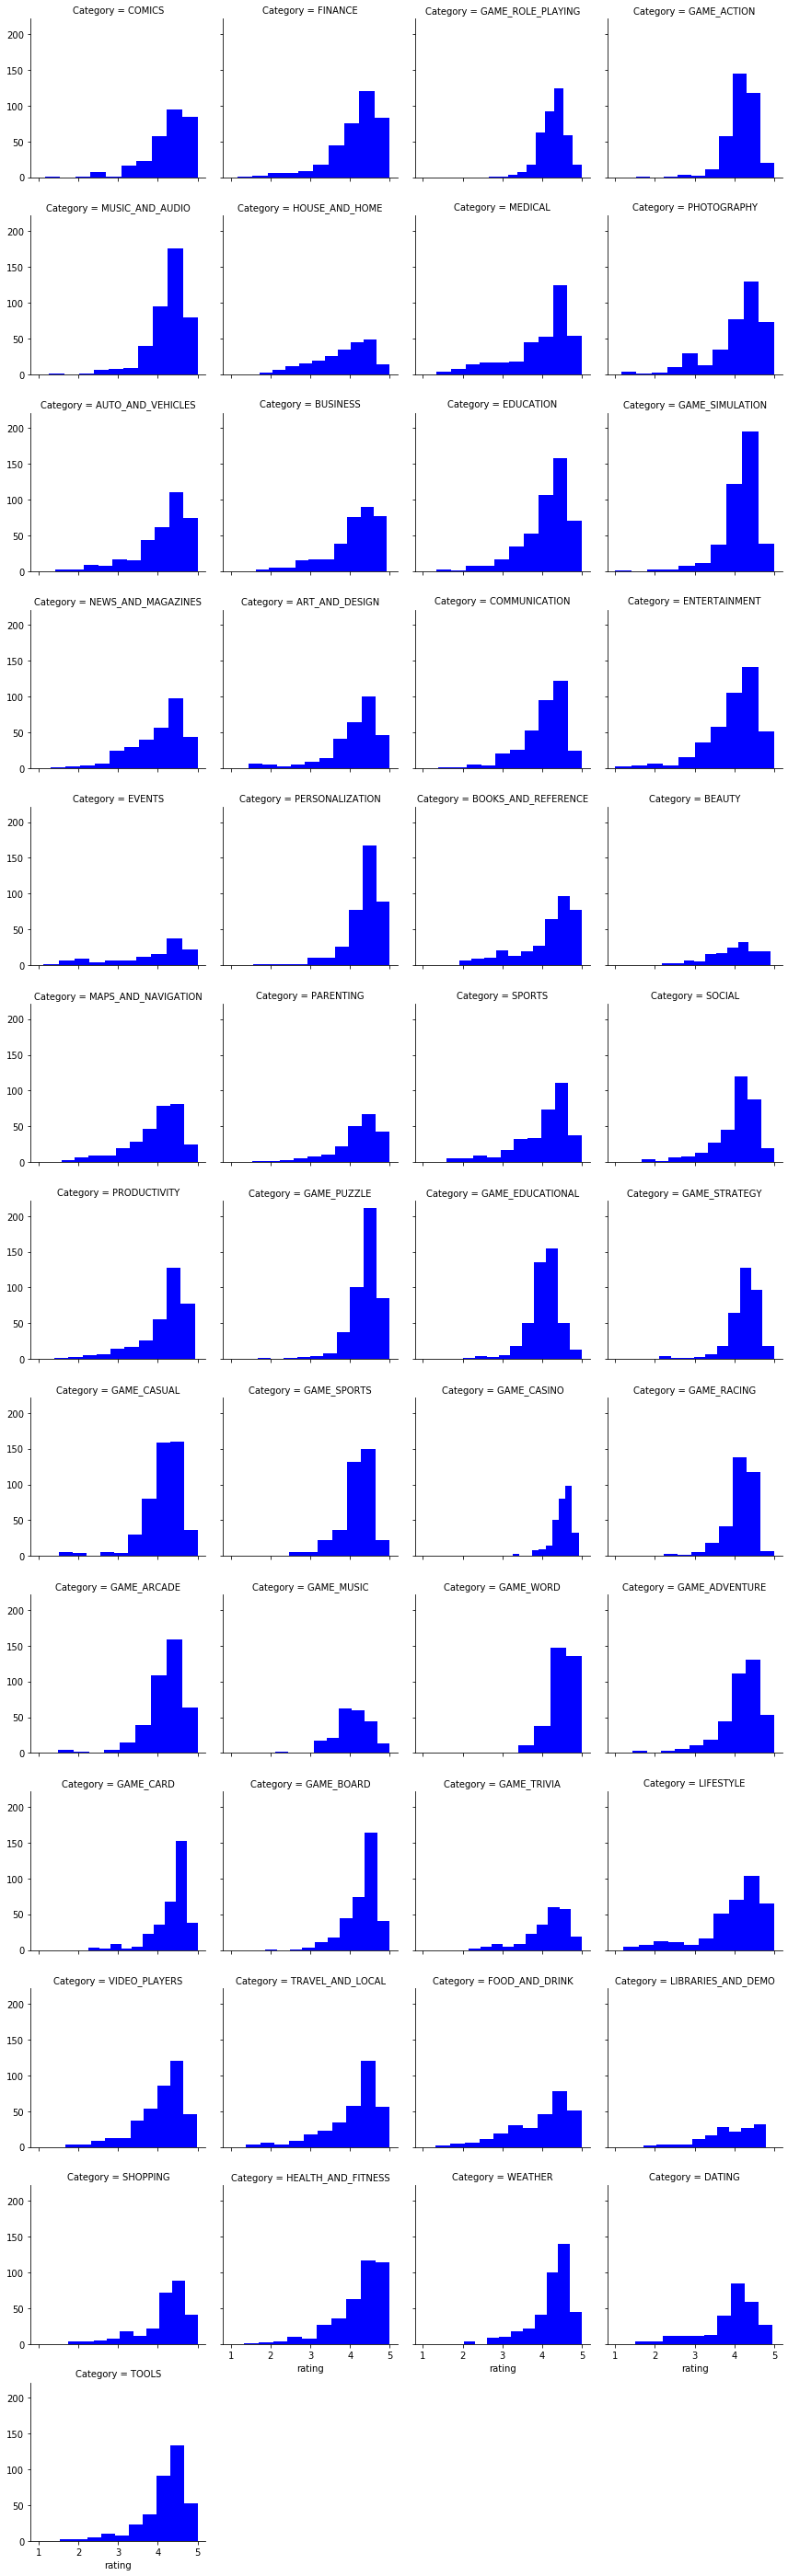

In [8]:
# Разбиение выборки на подвыборки по категориям
groups = df.groupby('Category').filter(lambda x: len(x) > 1).reset_index()

# Построение серии графиков, показывающих распределение рейтинга приложений в каждой категории
g = sns.FacetGrid(groups, col='Category', col_wrap=4, legend_out=True)
g.map(plt.hist, "rating", color="b")

In [9]:
# Формирование итогового отчета по всем категориями
category_totals = []
for i in df.groupby('Category').groups:
    category_totals.append([i,df.groupby('Category').get_group(i)['reviewCount'].sum().astype('int'),df.groupby('Category').get_group(i)['installs'].sum()])

# Создание листа pandas с данными хранящимися в category totals    
category_totals = pandas.DataFrame(category_totals, columns =['Category', 'Total_Reviews','Total_Installs']) 
# Расчеты соотношений - сколько установок приходится на один отзыв на приложении 
category_totals['InstallsOnReview'] = category_totals['Total_Installs']/category_totals['Total_Reviews']
# Сколько % отзывов от общего числа установок на приложении 
category_totals['InstallsOnReview%'] = category_totals['Total_Reviews']/category_totals['Total_Installs']*100
# Сортировка по столбцу
category_totals.sort_values(by=['InstallsOnReview'])

,Category,Total_Reviews,Total_Installs,InstallsOnReview,InstallsOnReview%
27,GAME_STRATEGY,173457146,2.387892e+09,13.766466,7.264029
14,GAME_ADVENTURE,92571422,1.487402e+09,16.067614,6.223699
13,GAME_ACTION,323021086,5.314868e+09,16.453624,6.077688
18,GAME_CASINO,43010752,8.114880e+08,18.867095,5.300233
17,GAME_CARD,25568382,5.425378e+08,21.219089,4.712738
24,GAME_ROLE_PLAYING,54866662,1.202625e+09,21.919051,4.562241
28,GAME_TRIVIA,31255534,6.961797e+08,22.273806,4.489578
25,GAME_SIMULATION,110218332,2.573751e+09,23.351384,4.282401
8,EDUCATION,45024936,1.052838e+09,23.383452,4.276529
39,PERSONALIZATION,88826610,2.192536e+09,24.683319,4.051319


In [10]:
# Приведение данных столбца aso keywords в удобный для анализа вид
df['aso_topwords'] = df['aso_keywords'].apply(lambda x: x.replace("'","").replace("[(",'').replace("(",'').split(",")[0:20:2])
df.head()

,index,id,data_id,title,bundle,Category,price,releaseDate,releaseDayCount,installs,...,version,androidVersion,contentRating,developerContacts,timestamp,developer,Geo,price_type,aso_keywords,aso_topwords
0,19049,66232,23197,ComiCat (Comic Reader/Viewer),meanlabs.comicat,COMICS,NaN,20.10.2012,2657.0,10000.0,...,2.42,4.0 and up,Everyone,support@meanlabs.com,19.01.2020,Meanlabs Software,en_US,Free,"[('comic reader', 44), ('comicat comic', 24), ...","[comic reader, comicat comic, reader viewer,..."
1,19066,67845,24767,10bii Financial Calculator,com.inadaydevelopment.cashcalculator,FINANCE,NaN,08.11.2010,3369.0,10000.0,...,4.2.3,4.4 and up,Everyone,theteam@inadaydevelopment.com,19.01.2020,In A Day Development,en_US,Free,"[('financial calculator', 68), ('10bii financi...","[financial calculator, 10bii financial, fina..."
2,19069,63515,20498,Children's doctor : dentist.,com.YovoGames.dentist,GAME_ROLE_PLAYING,0.0,09.08.2017,903.0,10000000.0,...,1.1.6,4.1 and up,Everyone,yovogames@gmail.com,19.01.2020,YovoGames,en_US,Free,"[('s doctor', 28), ('doctor dentist', 28), ('c...","[s doctor, doctor dentist, children s, chil..."
3,19112,63523,20506,Mario Kart Tour,com.nintendo.zaka,GAME_ACTION,0.0,24.09.2019,127.0,50000000.0,...,1.4.1,4.4 and up,Everyone,mariokarttour-support@nintendo.co.jp,19.01.2020,"Nintendo Co., Ltd.",en_US,Free,"[('mario kart', 60), ('kart tour', 32), ('mari...","[mario kart, kart tour, mario, kart, race ..."
4,19134,66254,23219,Piano Academy - Learn Piano,com.yokee.piano.keyboard,MUSIC_AND_AUDIO,0.0,19.12.2019,41.0,100000.0,...,1.0.2,6.0 and up,Everyone,support@pianoacademy.app,19.01.2020,Yokee™,en_US,Free,"[('piano academy', 40), ('u0026 39', 40), ('le...","[piano academy, u0026 39, learn piano, acad..."


In [11]:
# Метод возвращает наиболее популярные слова в выбранной категории
def get_top_category_words(set_category):
    # Показать все строки || настройка оболочки pandas + jupyter 
    pandas.set_option("display.max_rows", None)
    # Получение всех слов из списка, колонки aso topwords    
    all_words=[]    
    df.loc[df['Category'] == set_category]["aso_topwords"].apply(lambda x: all_words.extend(x))
    topwords = pandas.DataFrame(all_words, columns =['words'])
    # Удаление пробелов
    topwords['words'] = topwords['words'].str.strip()
    # Подсчет наиболее часто встречающихся слов
    topwords = topwords['words'].value_counts(normalize=False, sort=True, ascending=False)
    # Отображение
    display(set_category)
    return topwords


# Необходимо выбрать нужную категорию для анализа
set_category='GAME_RACING'
get_top_category_words(set_category)

'GAME_RACING'

racing                       73
car                          59
u0026 39                     54
racing game                  49
driving                      26
car racing                   21
car driving                  18
open world                   18
driving simulator            16
simulator                    16
drift                        16
off road                     13
game                         13
bike racing                  13
drag racing                  12
race                         11
bike                         11
traffic                      10
racing games                 10
drift racing                  9
next gen                      9
39 s                          9
2                             8
hill climb                    8
driving school                8
racing 2                      8
the next                      8
games                         8
car games                     7
car game                      7
http gmlft                    7
gmlft co